In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [3]:
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Tutorial for the Dataset module

Dataset is the class used to build, perform and post-process a set made of several calculation performed both with QuantumESPRESSO and Yambo.

Here we discuss some explicit examples to describe the usage and the main features of the package.

## Perform a convergence analysis for the gs energy of Silicon

We use this class to find the value of the energy cutoff that guarantees a converged result for the
ground state energy of Silicon.

We start from a given input file for Silicon

In [6]:
inp = I.PwInput(file='IO_files/si_scf.in')
#inp

And we define a Calculator that will be used by the Dataset class to run the computation

In [7]:
code1 = C.QeCalculator(mpi=2, skip = False)
code2 = C.QeCalculator(mpi=2, skip = False)
code1.global_options()

Initialize a QuantumESPRESSO calculator with scheduler direct
Initialize a QuantumESPRESSO calculator with scheduler direct


{'omp': 1,
 'mpi': 2,
 'mpi_run': 'mpirun -np',
 'executable': 'pw.x',
 'scheduler': 'direct',
 'skip': False,
 'clean_restart': True,
 'verbose': True}

Now we can define the instance of Dataset to perform the convergence procedure. Some information of the class
can be read as

In [8]:
gs_convergence = D.Dataset(label='Si_gs_convergence',run_dir='Si_gs_convergence', spin_orbit = False)
gs_convergence.global_options()

Initialize a Dataset with 2 parallel tasks


{'label': 'Si_gs_convergence',
 'run_dir': 'Si_gs_convergence',
 'num_tasks': 2,
 'verbose': True,
 'spin_orbit': False}

Dataset inherit from Runner so it has the same structure and we can use the same methods of QeCalculator and YamboCalculator 
to access to its global options. 

Note that in this case we have defined a spin_orbit variable that can be used later. This variables is 
stored in the global options of the dataset.

The run_dir identifies the folder in which the computations are performed. If you need to have separate run_dir for the various elements
of the dataset you can specify a run_dir in the append_run method

The next step is to append to the Dataset all the calculation that we want to peform lately.

For instance we can append some calculations in function of the cutoff energy. To show the design of the class
we make usage of two different calculators

In [9]:
eng_cut = 20 
idd = {'eng_cut' : eng_cut} #id that identifies the run in the Dataset
inp.set_prefix(D.name_from_id(idd)) #attribute the id as the prefix of the input
inp.set_energy_cutoff(eng_cut)
gs_convergence.append_run(id=idd,runner=code1,input=inp, variable1 = 'first_run')

The append_run method set the attribute of the object, for instance

In [10]:
print(gs_convergence.ids) # identify each element of the dataset
print(gs_convergence.calculators) # list with the calculators and the associated runs
gs_convergence.runs

[{'eng_cut': 20}]
[{'calc': <mppi.Calculators.QeCalculator.QeCalculator object at 0x7f9c11e8adf0>, 'iruns': [0]}]


[{'label': 'Si_gs_convergence',
  'run_dir': 'Si_gs_convergence',
  'num_tasks': 2,
  'verbose': True,
  'spin_orbit': False,
  'input': {'control': {'verbosity': "'high'",
    'pseudo_dir': "'../pseudos'",
    'calculation': "'scf'",
    'prefix': "'eng_cut_20'"},
   'system': {'force_symmorphic': '.true.',
    'occupations': "'fixed'",
    'ibrav': '2',
    'celldm(1)': '10.3',
    'ntyp': '1',
    'nat': '2',
    'ecutwfc': 20},
   'electrons': {'conv_thr': '1e-08'},
   'ions': {},
   'cell': {},
   'atomic_species': {'Si': ['28.086', 'Si.pbe-mt_fhi.UPF']},
   'atomic_positions': {'type': 'crystal',
    'values': [['Si', [0.125, 0.125, 0.125]],
     ['Si', [-0.125, -0.125, -0.125]]]},
   'kpoints': {'type': 'automatic',
    'values': ([4.0, 4.0, 4.0], [0.0, 0.0, 0.0])},
   'cell_parameters': {},
   'file': 'IO_files/si_scf.in'},
  'variable1': 'first_run',
  'name': 'eng_cut_20'}]

The name of the input files is evaluated from the ids using the function name_from_id.

We add further calculations, but this time we specify also the name of the file

In [11]:
eng_cut = 30 
idd = {'eng_cut' : eng_cut} #id that identifies the run in the Dataset
inp.set_prefix(D.name_from_id(idd)) #attribute the id as the prefix of the input
inp.set_energy_cutoff(eng_cut)
gs_convergence.append_run(id=idd,runner=code1,input=inp, name = 'second_run')

In [12]:
print(gs_convergence.ids) 
print(gs_convergence.calculators) 
gs_convergence.runs[1]

[{'eng_cut': 20}, {'eng_cut': 30}]
[{'calc': <mppi.Calculators.QeCalculator.QeCalculator object at 0x7f9c11e8adf0>, 'iruns': [0, 1]}]


{'label': 'Si_gs_convergence',
 'run_dir': 'Si_gs_convergence',
 'num_tasks': 2,
 'verbose': True,
 'spin_orbit': False,
 'input': {'control': {'verbosity': "'high'",
   'pseudo_dir': "'../pseudos'",
   'calculation': "'scf'",
   'prefix': "'eng_cut_30'"},
  'system': {'force_symmorphic': '.true.',
   'occupations': "'fixed'",
   'ibrav': '2',
   'celldm(1)': '10.3',
   'ntyp': '1',
   'nat': '2',
   'ecutwfc': 30},
  'electrons': {'conv_thr': '1e-08'},
  'ions': {},
  'cell': {},
  'atomic_species': {'Si': ['28.086', 'Si.pbe-mt_fhi.UPF']},
  'atomic_positions': {'type': 'crystal',
   'values': [['Si', [0.125, 0.125, 0.125]],
    ['Si', [-0.125, -0.125, -0.125]]]},
  'kpoints': {'type': 'automatic',
   'values': ([4.0, 4.0, 4.0], [0.0, 0.0, 0.0])},
  'cell_parameters': {},
  'file': 'IO_files/si_scf.in'},
 'name': 'second_run'}

Note that the variables passed as kwargs in the append run are added to the runs members.

We add further computations using also the second calculator

In [13]:
eng_cut = 40 
idd = 'eng_cut_%s'%eng_cut # the id can be also a string
inp.set_prefix(D.name_from_id(idd)) 
inp.set_energy_cutoff(eng_cut)
gs_convergence.append_run(id=idd,runner=code2,input=inp,variable3 = 'second_calculator')

eng_cut = 50 
idd = {'eng_cut' : eng_cut} 
inp.set_prefix(D.name_from_id(idd))
inp.set_energy_cutoff(eng_cut)
gs_convergence.append_run(id=idd,runner=code1,input=inp)

In [14]:
print(gs_convergence.ids) 
print(gs_convergence.calculators) 

[{'eng_cut': 20}, {'eng_cut': 30}, 'eng_cut_40', {'eng_cut': 50}]
[{'calc': <mppi.Calculators.QeCalculator.QeCalculator object at 0x7f9c11e8adf0>, 'iruns': [0, 1, 3]}, {'calc': <mppi.Calculators.QeCalculator.QeCalculator object at 0x7f9c11e8aaf0>, 'iruns': [2]}]


gs_convergence.runs is a list that contains the merge of the input object and the global options for each of the
appended run, in this way one can check which are the inputs associated to each calculator.

In [14]:
#gs_convergence.runs[1] #give the parameters of the runs associated to the second calculator

The attribute .results a dictionary that is empty before the run

In [18]:
gs_convergence.results

{}

Once that all the computation have been added we can run the Dataset

In [19]:
results = gs_convergence.run()
results

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
delete log file: Si_gs_convergence/eng_cut_20.log
delete log file: Si_gs_convergence/second_run.log
delete xml file: Si_gs_convergence/eng_cut_20.xml
delete folder: Si_gs_convergence/eng_cut_20.save
delete xml file: Si_gs_convergence/eng_cut_30.xml
delete folder: Si_gs_convergence/eng_cut_30.save
run command: cd Si_gs_convergence; mpirun -np 2 pw.x -inp eng_cut_20.in > eng_cut_20.log
run command: cd Si_gs_convergence; mpirun -np 2 pw.x -inp second_run.in > second_run.log
computation eng_cut_20 is running...
computation second_run is running...
computation eng_cut_20 ended
computation second_run ended
Task [0, 1] ended 

Run the task [2, 3] 
delete log file: Si_gs_convergence/eng_cut_40.log
delete log file: Si_gs_convergence/eng_cut_50.log
delete xml file: Si_gs_convergence/eng_cut_40.xml
delete xml file: Si_gs_convergence/eng_cut_50.xml
delete folder: Si_gs_convergence/eng_cut_40.save
d

{0: 'Si_gs_convergence/eng_cut_20.save/data-file-schema.xml',
 1: 'Si_gs_convergence/eng_cut_30.save/data-file-schema.xml',
 3: 'Si_gs_convergence/eng_cut_50.save/data-file-schema.xml',
 2: 'Si_gs_convergence/eng_cut_40.save/data-file-schema.xml'}

Note that the computations are performed in parallel using the num_tasks a the maximum number of 
parallel computations. According to this value the whole dataset is spliited into task_groups

The run method returns the attribute .results of the Dataset. 

In [20]:
gs_convergence.results

{0: 'Si_gs_convergence/eng_cut_20.save/data-file-schema.xml',
 1: 'Si_gs_convergence/eng_cut_30.save/data-file-schema.xml',
 3: 'Si_gs_convergence/eng_cut_50.save/data-file-schema.xml',
 2: 'Si_gs_convergence/eng_cut_40.save/data-file-schema.xml'}

This implementation allows us to parse the data after the execution of the dataset and/or to choose a parser 
among several choices. 

### Parsing of the results

One way to perform the parsing of the results is _a posteriori_ from the run of the dataset.

For instance we can parse the results with the PwParser class of this package

In [21]:
from mppi import Parsers as P
results = {}
for run,data in gs_convergence.results.items():
    results[run] = P.PwParser(data)

Parse file : Si_gs_convergence/eng_cut_20.save/data-file-schema.xml
Parse file : Si_gs_convergence/eng_cut_30.save/data-file-schema.xml
Parse file : Si_gs_convergence/eng_cut_50.save/data-file-schema.xml
Parse file : Si_gs_convergence/eng_cut_40.save/data-file-schema.xml


In [22]:
results

{0: <mppi.Parsers.PwParser.PwParser at 0x7f9c11bd5d60>,
 1: <mppi.Parsers.PwParser.PwParser at 0x7f9c55105be0>,
 3: <mppi.Parsers.PwParser.PwParser at 0x7f9c57fa81c0>,
 2: <mppi.Parsers.PwParser.PwParser at 0x7f9c550b7fa0>}

The results associate to the key "i" correspond to the i-th element appended to the run.

The input parameters associated to each key of results are written inside the gs_convergence_runs[key] list.

For instance the total energy is extracted as

In [23]:
for run,res in results.items():
    print('run',run,'energy',res.get_energy(convert_eV=False))

run 0 energy -7.87082131330662
run 1 energy -7.87295319773563
run 3 energy -7.874492376332525
run 2 energy -7.874327291710335


### Usage of the post processing function

In [25]:
# we can import the post_processing_function provided in the package as
from mppi.Datasets import PostProcessing as P
# and access to them as, for instance, P.QE_get_energy() 
# the same function can also be accessed as D.QE_get_energy()

The Parsing, or other more specific procedures, can be performed directly when the run method is called.

To do so, we define a post processing function and pass it to the Dataset. 

The class will apply this function when the run method of Dataset is called. For instance in this way we can directly 
extract the total energy 

In [26]:
def extract_energy(dataset): 
    from mppi import Parsers as P
    energy = {}
    for run,data in dataset.results.items():
        results = P.PwParser(data,verbose=False)
        energy[run] = results.get_energy(convert_eV = False)
    return energy

In [27]:
gs_convergence.set_postprocessing_function(extract_energy)

Once that the post processing function is passed to dataset it is directly applied when the run is executed

In [28]:
code1.update_global_options(skip=True)
code2.update_global_options(skip=True)
results = gs_convergence.run()
results

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
Skip the run of eng_cut_20
Skip the run of second_run
Task [0, 1] ended 

Run the task [2, 3] 
Skip the run of eng_cut_40
Skip the run of eng_cut_50
Task [2, 3] ended 



{0: -7.87082131330662,
 1: -7.87295319773563,
 3: -7.874492376332525,
 2: -7.874327291710335}

Since a post_processing_function has been provided, the run method return its value. 
Instead the .results attribute of the dataset still contains the xml output files

In [29]:
gs_convergence.results

{0: 'Si_gs_convergence/eng_cut_20.save/data-file-schema.xml',
 1: 'Si_gs_convergence/eng_cut_30.save/data-file-schema.xml',
 3: 'Si_gs_convergence/eng_cut_50.save/data-file-schema.xml',
 2: 'Si_gs_convergence/eng_cut_40.save/data-file-schema.xml'}

The post processed results can also be accessed in the class as self.post_processing(). 

In [30]:
gs_convergence.post_processing()

{0: -7.87082131330662,
 1: -7.87295319773563,
 3: -7.874492376332525,
 2: -7.874327291710335}

Various post_processing_function are provided in the package, for instance

In [10]:
from mppi.Datasets import PostProcessing as P

you can test the function P.QE_parse_data, P.QE_get_energy, and others

In [32]:
gs_convergence.set_postprocessing_function(P.QE_get_energy)
results = gs_convergence.run()
results

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
Skip the run of eng_cut_20
Skip the run of second_run
Task [0, 1] ended 

Run the task [2, 3] 
Skip the run of eng_cut_40
Skip the run of eng_cut_50
Task [2, 3] ended 



{0: -7.87082131330662,
 1: -7.87295319773563,
 3: -7.874492376332525,
 2: -7.874327291710335}

Since the dataset has been already computed we can simply test the effects of the various function
as follows

In [40]:
gs_convergence.set_postprocessing_function(P.QE_get_gap)
gs_convergence.post_processing()

There are no empty states. Gap cannot be computed.
There are no empty states. Gap cannot be computed.
There are no empty states. Gap cannot be computed.
There are no empty states. Gap cannot be computed.


{1: 0, 0: 0, 2: 0, 3: 0}

### Usage of the fetch_results method

We can use fetch_results to seek for the attribute energy in the computation(s) that match the id 
passed in fetch_results.

For instance we can use a generic post_processing_function that parse the data and extract the energy
using the `attribute` argument of fetch_results 

In [46]:
gs_convergence.set_postprocessing_function(P.QE_parse_data)

In [47]:
gs_convergence.fetch_results(id={'eng_cut': 50},attribute='energy')

[-7.874492376332525]

or we can use a more specific post_processing_fiunction and extract directly the energy

In [48]:
gs_convergence.set_postprocessing_function(P.QE_get_energy)

In [49]:
gs_convergence.fetch_results(id={'eng_cut': 50})

[-7.874492376332525]

Note that it is not necesary to run the dataset since the fetch_results method perform the runs that match
with the id (if the option run_if_not_present=True is used)

### Usage of the seek_convergence method

We present the functionality of this method by performing a second convergence test on the number of kpoints.

In this example we set the energy cutoff to 60 Ry and build a new dataset appending run with increasing number of
kpoints.

In [104]:
inp = I.PwInput('IO_files/si_scf.in')
inp.set_energy_cutoff(60)

In [105]:
code = C.QeCalculator(mpi = 2, skip=True,verbose=False)

Initialize a QuantumESPRESSO calculator with scheduler direct


In [106]:
gs_kpoint = D.Dataset(label='Si_kpoints_convergence',run_dir='Si_gs_convergence',verbose=False)

Initialize a Dataset with 2 parallel tasks


In [107]:
kpoints = [2,3,4,5,6,7,8]

In [108]:
for k in kpoints:
    id = {'kp':k}
    inp.set_kpoints(points = [k,k,k])
    inp.set_prefix(D.name_from_id(id))
    gs_kpoint.append_run(id=id,runner=code,input=inp)

The runs have been appended but not performed, then we call seek_convergence.

We want to perform a convergence procedure based on the value of the total energy of the system.
So we can use the post processing function that directly provides this quantity

In [109]:
gs_kpoint.set_postprocessing_function(P.QE_get_energy)

Seeking convergence for id " {'kp': 2} "
Seeking convergence for id " {'kp': 3} "
Seeking convergence for id " {'kp': 4} "
Convergence reached in Dataset "Si_kpoints_convergence" for id " {'kp': 4} "


/home/marco/Applications/MPPI/mppi/Datasets/Dataset.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  if id_conv is not None:


{'id_conv': {'kp': 4}, 'value_conv': -7.87451395219888}

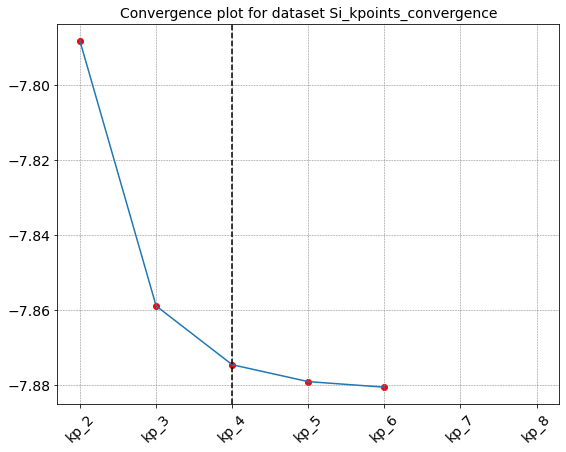

In [113]:
gs_kpoint.seek_convergence(rtol=0.001,convergence_level=2)

Seek_converge runs all the computation (in the order provided by append_run) until convergence is reached.
Otherwise it is possible to pass a list of ids as argument of the method, in this case the calculation are restricted
to the simulations associated to the provided ids.

It is also possible to use a more generic post processing function that simply parse the data.
In this case we can choose which quantity is used to check if the convergence is reached by specifying the attribute = ...
options in the call of the seek_convergence. For instance

In [114]:
gs_kpoint.set_postprocessing_function(P.QE_parse_data)

Seeking convergence for id " {'kp': 2} "
Seeking convergence for id " {'kp': 3} "
Seeking convergence for id " {'kp': 4} "
Convergence reached in Dataset "Si_kpoints_convergence" for id " {'kp': 4} "


{'id_conv': {'kp': 4}, 'value_conv': -7.87451395219888}

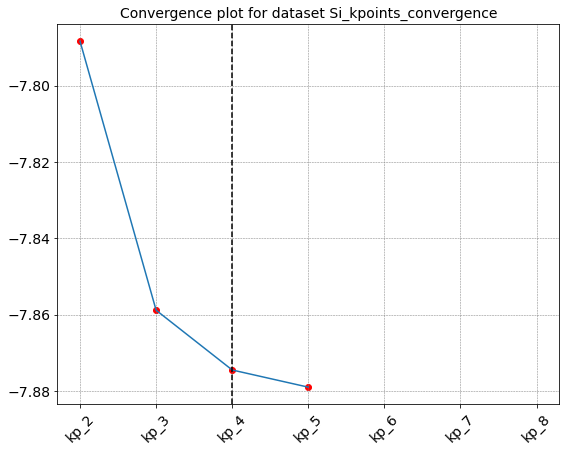

In [115]:
gs_kpoint.seek_convergence(rtol=0.001,attribute='energy')

## Perform a convergence test for Hartree-Fock computations with Yambo

We consider a set of Hartree-Fock computation for silicon and we look for the value of the EXXRLvcs that ensure
a converged value of the direct gap.

First of all we need a nscf computation. We start from scf result with ecutoff = 60 and kpoints = [4,4,4]

In [117]:
inp = I.PwInput('Si_gs_convergence/kp_4.in')
inp.set_nscf(8,force_symmorphic=True)
inp.set_kpoints(points = [6,6,6]) #nscf kpoints can be different from the scf
name = 'nscf_kp6_ecut60'
inp.set_prefix(name)
#inp

In [86]:
code = C.QeCalculator(mpi=4)
code.global_options()

Initialize a QuantumESPRESSO calculator with scheduler direct


{'omp': 1,
 'mpi': 4,
 'mpi_run': 'mpirun -np',
 'executable': 'pw.x',
 'scheduler': 'direct',
 'skip': True,
 'clean_restart': True,
 'verbose': True}

In [29]:
code.run(run_dir='Si_gs_convergence',input=inp,name=name,source_dir='Si_gs_convergence/kp_4.save')

The folder Si_gs_convergence/nscf_kp6_ecut60.save already exsists. Source folder Si_gs_convergence/kp_4.save not copied
Skip the run of nscf_kp6_ecut60


'Si_gs_convergence/nscf_kp6_ecut60.save/data-file-schema.xml'

The next step is the generation of the run_dir and SAVE folder

In [30]:
from mppi import Utilities as U

In [118]:
run_dir = 'Si_hf_convergence'
source_dir = 'Si_gs_convergence/nscf_kp6_ecut60.save'

In [88]:
U.build_SAVE(source_dir,run_dir)

SAVE folder already present in Si_hf_convergence. No operations performed.


Now we are ready to build the Yambo dataset

In [119]:
code = C.YamboCalculator()
code.global_options()

Initialize a Yambo calculator with scheduler direct


{'omp': 1,
 'mpi': 2,
 'mpi_run': 'mpirun -np',
 'executable': 'yambo',
 'scheduler': 'direct',
 'skip': True,
 'clean_restart': True,
 'verbose': True}

In [120]:
inp = I.YamboInput(args='yambo -x -V rl',folder=run_dir)
inp.set_kRange(1,1) # we are interested at the direct gap at Gamma so we include only the first kpoint
inp

{'args': 'yambo -x -V rl',
 'folder': 'Si_hf_convergence',
 'filename': 'yambo.in',
 'arguments': ['HF_and_locXC'],
 'variables': {'FFTGvecs': [2733.0, 'RL'],
  'SE_Threads': [0.0, ''],
  'EXXRLvcs': [17153.0, 'RL'],
  'VXCRLvcs': [17153.0, 'RL'],
  'QPkrange': [[1, 1, 1, 8], '']}}

In [121]:
hf_convergence = D.Dataset(label='Si_hf',run_dir=run_dir)
hf_convergence.global_options()

Initialize a Dataset with 2 parallel tasks


{'label': 'Si_hf',
 'run_dir': 'Si_hf_convergence',
 'num_tasks': 2,
 'verbose': True}

Let us start by adding some computations to see how to manage the data

In [122]:
exx_values = [1.,2.,3.] #in Hartree

In [123]:
for e in exx_values:
    id = {'exxrl' : e}
    inp['variables']['EXXRLvcs'] = [1e3*e, 'mHa']
    hf_convergence.append_run(id=id,input=inp,runner=code)

 If needed we can also pass the jobname attribute by adding, for istance
 
 jobname=D.name_from_id(id)+'-job' 
 
 in the appen_run. For instance

In [124]:
exx = 4.
id = {'exxrl' : exx}
inp['variables']['EXXRLvcs'] = [1e3*exx, 'mHa']
hf_convergence.append_run(id=id,input=inp,jobname=D.name_from_id(id)+'-job',runner=code)

In [39]:
hf_convergence.runs[3]

{'label': 'Si_hf',
 'run_dir': 'Si_hf_convergence',
 'num_tasks': 2,
 'verbose': True,
 'input': {'args': 'yambo -x -V rl',
  'folder': 'Si_hf_convergence',
  'filename': 'yambo.in',
  'arguments': ['HF_and_locXC'],
  'variables': {'FFTGvecs': [2733.0, 'RL'],
   'SE_Threads': [0.0, ''],
   'EXXRLvcs': [4000.0, 'mHa'],
   'VXCRLvcs': [17153.0, 'RL'],
   'QPkrange': [[1, 1, 1, 8], '']}},
 'jobname': 'exxrl_4.0-job',
 'name': 'exxrl_4.0'}

Then we can run the dataset

In [40]:
hf_convergence.run()

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
Skip the run of exxrl_2.0
Skip the run of exxrl_1.0
Task [0, 1] ended 

Run the task [2, 3] 
Skip the run of exxrl_4.0
Skip the run of exxrl_3.0
Task [2, 3] ended 



{1: {'output': ['Si_hf_convergence/exxrl_2.0/o-exxrl_2.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_2.0/ndb.HF_and_locXC'},
 0: {'output': ['Si_hf_convergence/exxrl_1.0/o-exxrl_1.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_1.0/ndb.HF_and_locXC'},
 3: {'output': ['Si_hf_convergence/exxrl_4.0/o-exxrl_4.0-job.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_4.0-job/ndb.HF_and_locXC'},
 2: {'output': ['Si_hf_convergence/exxrl_3.0/o-exxrl_3.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_3.0/ndb.HF_and_locXC'}}

In [41]:
hf_convergence.results

{1: {'output': ['Si_hf_convergence/exxrl_2.0/o-exxrl_2.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_2.0/ndb.HF_and_locXC'},
 0: {'output': ['Si_hf_convergence/exxrl_1.0/o-exxrl_1.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_1.0/ndb.HF_and_locXC'},
 3: {'output': ['Si_hf_convergence/exxrl_4.0/o-exxrl_4.0-job.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_4.0-job/ndb.HF_and_locXC'},
 2: {'output': ['Si_hf_convergence/exxrl_3.0/o-exxrl_3.0.hf'],
  'dft': 'Si_hf_convergence/SAVE/ns.db1',
  'HF_and_locXC': 'Si_hf_convergence/exxrl_3.0/ndb.HF_and_locXC'}}

### Parsing the results with a post processing function

We can define a general post processing function to extract all the results from the o- files of the dataset.

We can use the YamboParser class of this package

In [125]:
def parse_data(dataset):
    from mppi import Parsers as P
    results = {}
    for run,data in dataset.results.items():
        results[run] = P.YamboParser(data,verbose=True)
    return results

In [126]:
hf_convergence.set_postprocessing_function(parse_data)

In [127]:
code.update_global_options(verbose=False,skip=True)
results = hf_convergence.run()

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
Skip the run of exxrl_2.0
Skip the run of exxrl_1.0
Task [0, 1] ended 

Run the task [2, 3] 
Skip the run of exxrl_4.0
Skip the run of exxrl_3.0
Task [2, 3] ended 

Parse file Si_hf_convergence/exxrl_2.0/o-exxrl_2.0.hf
Parse file : Si_hf_convergence/SAVE/ns.db1
Parse file Si_hf_convergence/exxrl_1.0/o-exxrl_1.0.hf
Parse file : Si_hf_convergence/SAVE/ns.db1
Parse file Si_hf_convergence/exxrl_4.0/o-exxrl_4.0-job.hf
Parse file : Si_hf_convergence/SAVE/ns.db1
Parse file Si_hf_convergence/exxrl_3.0/o-exxrl_3.0.hf
Parse file : Si_hf_convergence/SAVE/ns.db1


Results can be extracted as

In [128]:
for irun in results:
    data = results[irun].data
    print(data['hf']['ehf'])

[-18.5920771   -0.98291615  -0.9763885   -0.97688737   6.96150102
   6.96142707   6.95129216   8.07606703]
[-18.5149594   -0.5280984   -0.52432564  -0.52620809   7.25884257
   7.25947058   7.24850752   8.57440589]
[-18.632854    -1.14186462  -1.1418194   -1.14185213   6.77885838
   6.77883889   6.77870771   7.89729728]
[-18.6264669   -1.12492861  -1.1253136   -1.12534784   6.79757485
   6.79746045   6.79699993   7.91634358]


### Computing the direct gap with a post processing function

We describe the usage of a post processing function to perform a more specific operation like computing
the direct band gap. We define the post processing function

In [129]:
def get_direct_gap(dataset):
    """"
    Compute the direct band gap assuming that there is only one kpoint.
    The arguments energy_col, val_band and cond_band are read from the global_options
    of the dataset.
    """
    from mppi import Parsers as P
    import numpy as np
    glob_opt = dataset.global_options()
    val_band = glob_opt.get('val_band')
    cond_band = glob_opt.get('cond_band')
    # the name of the column used to compute the gap
    energy_col = glob_opt.get('energy_col','hf') 
    gap = {}
    for run,data in dataset.results.items():
        results = P.YamboParser(data).data
        key = list(results.keys())[0] # select the key (can be hf or qp)
        bands = results[key]['band']
        index_val = np.where(bands == val_band)
        index_cond = np.where(bands == cond_band)
        energy = results[key][energy_col]
        delta = energy[index_cond]-energy[index_val]
        gap[run] = float(delta)
    return gap

This function assume that some inputs like the specification of the conduction and valence bands are given in the global options
of the dataset. So we can se

In [130]:
hf_convergence.update_global_options(val_band = 4, cond_band = 5, energy_col = 'hf')

Then we set the new post processing function and run the dataset

In [131]:
hf_convergence.set_postprocessing_function(get_direct_gap)

In [58]:
hf_convergence.run()

Run the selection [0, 1, 2, 3] with the parallel task_groups [[0, 1], [2, 3]] 

Run the task [0, 1] 
Skip the run of exxrl_2.0
Skip the run of exxrl_1.0
Task [0, 1] ended 

Run the task [2, 3] 
Skip the run of exxrl_4.0
Skip the run of exxrl_3.0
Task [2, 3] ended 



{1: 6.678640580000001,
 0: 6.525302829999999,
 3: 6.66096274,
 2: 6.663174910000001}

### Usage of seek convergence

The post processing function defined above can be used together with the seek_convergence method to perform a convergence study

In this case we define a new dataset and append many possible runs. Only those one needed to reach the given tolerance will be executed

In [132]:
hf_convergence2 = D.Dataset(label='Si_hf',run_dir=run_dir,val_band=4,cond_band=5,var_name ='hf',verbose=False)

Initialize a Dataset with 2 parallel tasks


In [133]:
exx_values = [float(i) for i in range(1,10)] #in Hartree
exx_values

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [134]:
for e in exx_values:
    id = {'exxrl' : e}
    inp['variables']['EXXRLvcs'] = [1e3*e, 'mHa']
    hf_convergence2.append_run(id=id,input=inp,runner=code)

In [135]:
hf_convergence2.set_postprocessing_function(get_direct_gap)

Seeking convergence for id " {'exxrl': 1.0} "
Seeking convergence for id " {'exxrl': 2.0} "
Seeking convergence for id " {'exxrl': 3.0} "
Seeking convergence for id " {'exxrl': 4.0} "
Seeking convergence for id " {'exxrl': 5.0} "
Convergence reached in Dataset "Si_hf" for id " {'exxrl': 5.0} "


{'id_conv': {'exxrl': 5.0}, 'value_conv': 6.661829569999999}

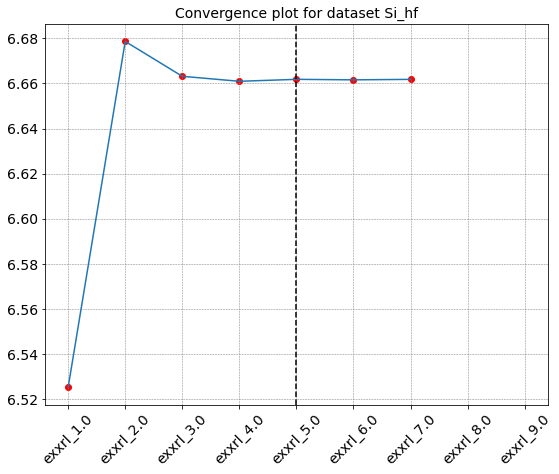

In [136]:
hf_convergence2.seek_convergence(rtol=0.0001,convergence_level=2)